In [12]:
import time
import csv2md
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import open3d
from numpy import linalg as LA
import os
import h5py
import pandas as pd
from torch import nn
import math
import sys
sys.path.insert(1, 'C:/cherepashkin1/circles/finetune_test/')
from helpers import *

In [16]:
exec(open('C:/cherepashkin1/circles/finetune_test/helpers.py','r').read())

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Check distribution of orient values

In [3]:
df = pd.read_csv('C:/cherepashkin1/circles/finetune_test/csv/598frame.csv')

In [5]:
GTw = df.loc[:,['orient' + str(i) for i in range(9)]].values

In [6]:
GTw.shape

(5283, 9)

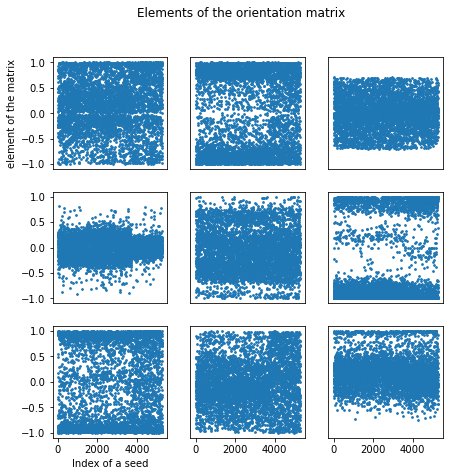

In [32]:
exec(open('C:/cherepashkin1/circles/finetune_test/helpers.py','r').read())
fig = plotori([GTw.reshape([-1,3,3])], tit='Elements of the orientation matrix', xtit = 'Index of a seed', ylim=(-1.1,1.1))

In [35]:
sf(fig, 'figs')

In [36]:
np.arcsin(-0.99)

-1.4292568534704695

In [37]:
np.arcsin(0.99)

1.4292568534704695

In [38]:
GTw.shape

(5283, 9)

In [39]:
or1 = GTw.reshape([-1,3,3])

In [40]:
or1.shape

(5283, 3, 3)

In [46]:
or1[0]

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

Multiplying matrix by -1 is the same, as adding pi or minus pi to the euler angles

In [42]:
rot2eul(or1[0])

array([-0.79223651,  1.11793084, -0.30764163])

In [45]:
math.pi + rot2eul(or1[0])

array([2.34935614, 4.25952349, 2.83395103])

In [43]:
rot2eul(-or1[0])

array([ 2.34935614, -1.11793084,  2.83395103])

# Calculate minimum of losses

In [47]:
loss_fn = nn.MSELoss(reduction='none')

In [48]:
output = t.rand(15,9)

In [49]:
gt = t.rand(15,9)

In [50]:
output[0]-gt[0]

tensor([-0.0862, -0.1637, -0.2486, -0.7499,  0.1922, -0.1950, -0.2021, -0.9548,
        -0.2643])

In [107]:
t.min(loss_fn(output, gt), loss_fn(output, -gt)).shape

torch.Size([15, 9])

In [108]:
t.mean(t.min(loss_fn(output, gt), loss_fn(output, -gt)))

tensor(0.1465)

In [121]:
t.min(t.tensor([1, 2, 3]), t.tensor([2, 1, 4]))

tensor([1, 1, 3])

In [128]:
t.amin(t.tensor([[1, 2, 3], [2,1,4]]), dim=0)

tensor([1, 1, 3])

In [57]:
gt.shape

torch.Size([15, 9])

In [58]:
gt0 = gt[0]

In [59]:
gt0.shape

torch.Size([9])

In [60]:
gt1 = gt0.reshape([3,3])

In [61]:
gt1.shape

torch.Size([3, 3])

In [62]:
idx = np.array([[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]])

In [63]:
idx.shape

(6, 3)

In [64]:
for i in range(6):
    print(idx[i,:])

[0 1 2]
[0 2 1]
[1 0 2]
[1 2 0]
[2 0 1]
[2 1 0]


In [68]:
1%2

1

In [76]:
t.tensor([(-1)**(i%2)*gt1[:,idx[i//2,:]] for i in range(12)])

ValueError: only one element tensors can be converted to Python scalars

In [90]:
gt.shape

torch.Size([15, 9])

In [98]:
output.shape

torch.Size([15, 9])

In [141]:
gt.reshape(-1,3,3).shape

torch.Size([15, 3, 3])

In [138]:
gt3 = gt.reshape(-1,3,3)
gt4 = t.zeros(gt3.shape[0],12,3,3)
lo = t.zeros(gt3.shape[0],12,9)
for j in range(gt3.shape[0]):
    for i in range(12):
        gt4[j,i,:,:] = (-1)**(i%2)*gt3[j,:,idx[i//2,:]]
        lo[j,i,:] = loss_fn(gt4[j,i,:,:].reshape(-1,9), output[j,:])
loss = t.mean(t.amin(lo, dim=1))

In [139]:
loss

tensor(0.0521)

In [122]:
lo.shape

torch.Size([15, 12, 9])

In [137]:
lo[0,2,:]

tensor([0.0074, 0.6453, 0.1529, 0.5624, 0.0983, 0.1001, 0.0408, 0.1337, 0.7285])

In [134]:
t.amin(lo, dim=1)[0]

tensor([0.0074, 0.0024, 0.0618, 0.2360, 0.0024, 0.0380, 0.0028, 0.1337, 0.0699])

In [119]:
t.min(lo,dim=1)

torch.return_types.min(
values=tensor([[7.4248e-03, 2.4345e-03, 6.1795e-02, 2.3601e-01, 2.4475e-03, 3.8040e-02,
         2.7741e-03, 1.3366e-01, 6.9874e-02],
        [3.0454e-06, 2.1222e-03, 8.2776e-04, 6.0206e-06, 6.2252e-02, 5.1937e-03,
         4.6103e-02, 1.4824e-03, 6.2338e-04],
        [1.6932e-04, 2.2219e-04, 2.9725e-02, 7.7859e-03, 3.6446e-03, 1.3518e-01,
         6.7949e-05, 2.5111e-03, 1.0878e-01],
        [2.2307e-04, 1.3739e-02, 7.3173e-03, 2.9067e-03, 2.5231e-03, 1.1443e-03,
         6.3966e-02, 1.9248e-03, 1.9626e-02],
        [8.5598e-05, 5.8223e-03, 2.9346e-03, 4.0489e-05, 6.6668e-06, 3.0103e-03,
         1.1470e-01, 4.0637e-04, 5.7765e-03],
        [3.3197e-05, 2.2370e-03, 1.8505e-03, 1.5067e-02, 8.0371e-03, 5.6294e-04,
         8.1897e-02, 1.7891e-02, 3.6758e-03],
        [3.4155e-02, 2.2678e-03, 1.8069e-03, 4.2062e-02, 7.5622e-02, 1.1752e-01,
         4.6144e-01, 1.1377e-02, 4.2165e-01],
        [3.6184e-03, 1.6108e-02, 5.4594e-02, 1.7361e-03, 3.1975e-03, 3.5066e-02,

In [105]:
lo.shape

torch.Size([15, 12, 9])

In [104]:
t.min(lo)

tensor(1.3683e-06)

In [96]:
gt4.shape

torch.Size([15, 12, 3, 3])

In [97]:
gt2.shape

torch.Size([12, 3, 3])

In [ ]:
for i in range(12):
    lo0[i] = loss_fn(output[0].reshape(-1,3,3), gt4[j,i,:,:])    

In [79]:

gt0.reshape([3,3])
gt1 = gt0.reshape([3,3])
gt2 = t.zeros(12,3,3)
for i in range(12):
    gt2[i,:,:] = (-1)**(i%2)*gt1[:,idx[i//2,:]]

In [80]:
gt2.shape

torch.Size([12, 3, 3])

In [87]:
output.shape

torch.Size([15, 9])

In [89]:
output[0].reshape(-1,3,3).shape

torch.Size([1, 3, 3])

In [88]:
lo0 = t.zeros(12,3,3)
for i in range(12):
#     print(loss_fn(output, gt2[i,:,:]).shape)
    lo0[i] = loss_fn(output[0].reshape(-1,3,3), gt2[i,:,:])

C:\Users\v.cherepashkin\Anaconda3\envs\sh\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([3, 3])) that is different to the input size (torch.Size([1, 3, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
gt2[i]

In [67]:
t.min(gt2[i,:,:])

tensor(0.1330)